# **SpaceX Falcon 9 Landing Prediction Project**

SpaceX is a commercial space company that specialises in advancing rocket propulsion, resuable launch vehicles, human spaceflight, and satellite constellation technology.

With a vision to reduce launch costs, SpaceX designed the Falcon 9 that launches with a cost of 62 milllion dollars (whereas other providers cost more than 192 million dollars) by creating the first stage to be resuable.
Hence, we can predict the cost of each launch depending on whether the first stage can land. 

This project develops a machine learning model to predict whether the first stage of the Falcon 9 can land successfully.

# 1.Data Collection and Wrangling

First, we start with collecting the SpaceX launch dataset. This can be done by connecting to an API and cleaning it to provide the data and variables we require.

In [5]:
import pandas as pd
import numpy as np

In [83]:
data=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [22]:
# To find the number of data points and variables in the dataset
data.shape

(90, 17)

In [24]:
# To look at the type of variables used.
data.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [26]:
# To find the amount of missing values of each variable.
data.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [28]:
# To find the number of launches at each site.
data['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [30]:
# To find the number and occurence at each orbit.
data['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [40]:
# To calculate the number and occurence of mission outcome of the orbits.
landing_outcomes = data['Outcome'].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [42]:

for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [46]:
# To create a situation where the launch does not land.
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

# To create a landing outcome label from Outcome column
landing_class = []
for outcome in data['Outcome']:
    if outcome in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

In [54]:
data['Class']=landing_class
data[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [58]:
data["Class"].mean()

0.6666666666666666

# 2. Exploratory Data Analysis with SQL

Now, we install the SQL extension and establish a connection to the database to proceed with Exploratory Data Analysis.

In [3]:
!pip install sqlalchemy==1.3.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp312-cp312-macosx_11_0_arm64.whl size=1155229 sha256=3bab87b472adfb9c7c775bca435c19dff7fe67b40c215a68306af30a41235a68
  Stored in directory: /Users/akshugade/Library/Caches/pip/wheels/b3/1c/42/0e26b8d512adc6bce10ff71a05229366b4ccec641cd3b42111
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.34
    Uninstalling SQLAlchemy-2.0.34:
      Successfully uninstalled SQLAlchemy-2.0.34
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aext-project-filebrowser-server 4.1.0 requires sqlalchemy>=2.0.29, but you have sqlalchemy 1.3.9 which is incompatible.


In [5]:
!pip install ipython-sql
!pip install ipython-sql prettytable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [7]:
%load_ext sql

In [9]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [11]:
!pip install -q pandas
%sql sqlite:///my_data1.db

In [17]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [19]:
%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [21]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

1. Display the names of the unique launch sites in the space mission.

In [34]:
%%sql
SELECT DISTINCT Launch_Site
FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


2. Display 5 records where launch sites begin with the string 'CCA'

In [43]:
%%sql
SELECT *
FROM SPACEXTABLE
WHERE Launch_Site = 'CCA'
LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome


3. Display the total payload mass carried by boosters launched by NASA (CRS)

In [45]:
%%sql
SELECT SUM(PAYLOAD_MASS__KG_)
FROM SPACEXTABLE
WHERE Launch_Site = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


SUM(PAYLOAD_MASS__KG_)
None


4. Display average payload mass carried by booster version F9 v1.1

In [48]:
%%sql
SELECT AVG(PAYLOAD_MASS__KG_)
FROM SPACEXTABLE
WHERE Booster_Version LIKE 'F9 v1.0%';

 * sqlite:///my_data1.db
Done.


AVG(PAYLOAD_MASS__KG_)
340.4


5. List the date when the first succesful landing outcome in ground pad was acheived. 

In [51]:
%%sql
SELECT MIN(Date)
FROM SPACEXTABLE
WHERE Landing_Outcome = 'Success (ground pad)';

 * sqlite:///my_data1.db
Done.


MIN(Date)
2015-12-22


6. List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000.

In [54]:
%%sql
SELECT Booster_Version
FROM SPACEXTABLE
WHERE Landing_Outcome = 'Success (drone ship)'
AND 4000 < Payload_Mass__Kg_ < 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1021.1
F9 FT B1022
F9 FT B1023.1
F9 FT B1026
F9 FT B1029.1
F9 FT B1021.2
F9 FT B1029.2
F9 FT B1036.1
F9 FT B1038.1
F9 B4 B1041.1


7. List the total number of successful and failure mission outcomes

In [57]:
%%sql
SELECT Mission_Outcome, Count(Mission_Outcome) AS Total_Number
FROM SPACEXTABLE
GROUP BY Mission_Outcome;

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Total_Number
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


8. List all the booster_versions that have carried the maximum payload mass, using a subquery with a suitable aggregate function.

In [60]:
%%sql
SELECT DISTINCT Booster_Version
FROM SPACEXTABLE
WHERE PAYLOAD_MASS__KG_ = (
    SELECT MAX(PAYLOAD_MASS__KG_)
    FROM SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


9. Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.

In [69]:
%%sql
SELECT LANDING_OUTCOME, COUNT(LANDING_OUTCOME) AS TOTAL_NUMBER
FROM SPACEXTABLE
WHERE DATE BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY LANDING_OUTCOME
ORDER BY TOTAL_NUMBER DESC

 * sqlite:///my_data1.db
Done.


Landing_Outcome,TOTAL_NUMBER
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


# 3. Exploratory Data Analysis with Data Visualisation

Here, we will perform Exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib.

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
data=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Now, we can visualise the relationships between variables in the datset using plots.

1. Visualize the relationship between Flight Number and Launch Site.

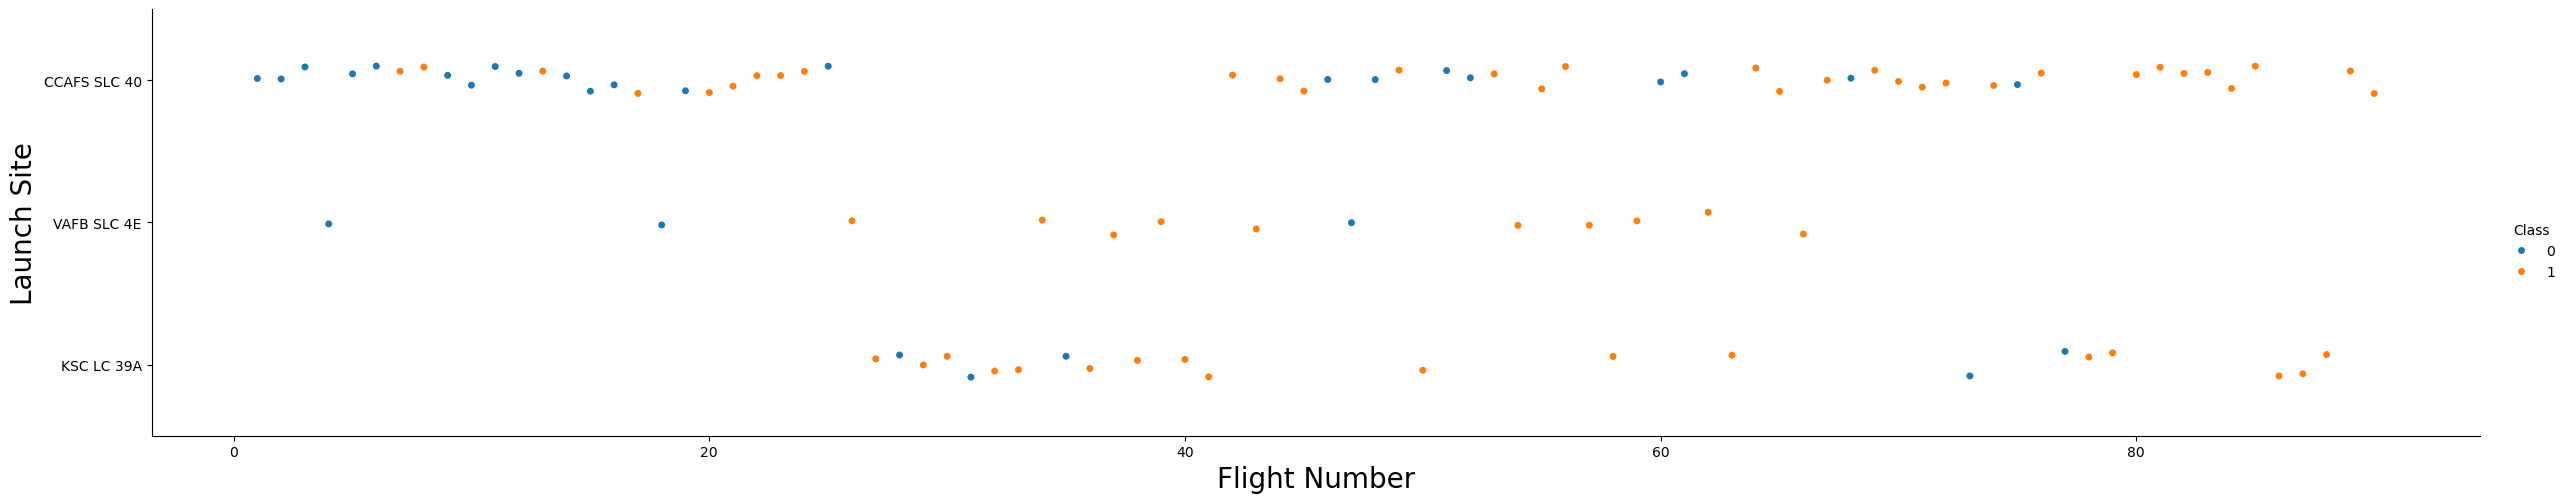

In [116]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue = "Class", data=data, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

2. Visualize the relationship between Payload Mass and Launch Site

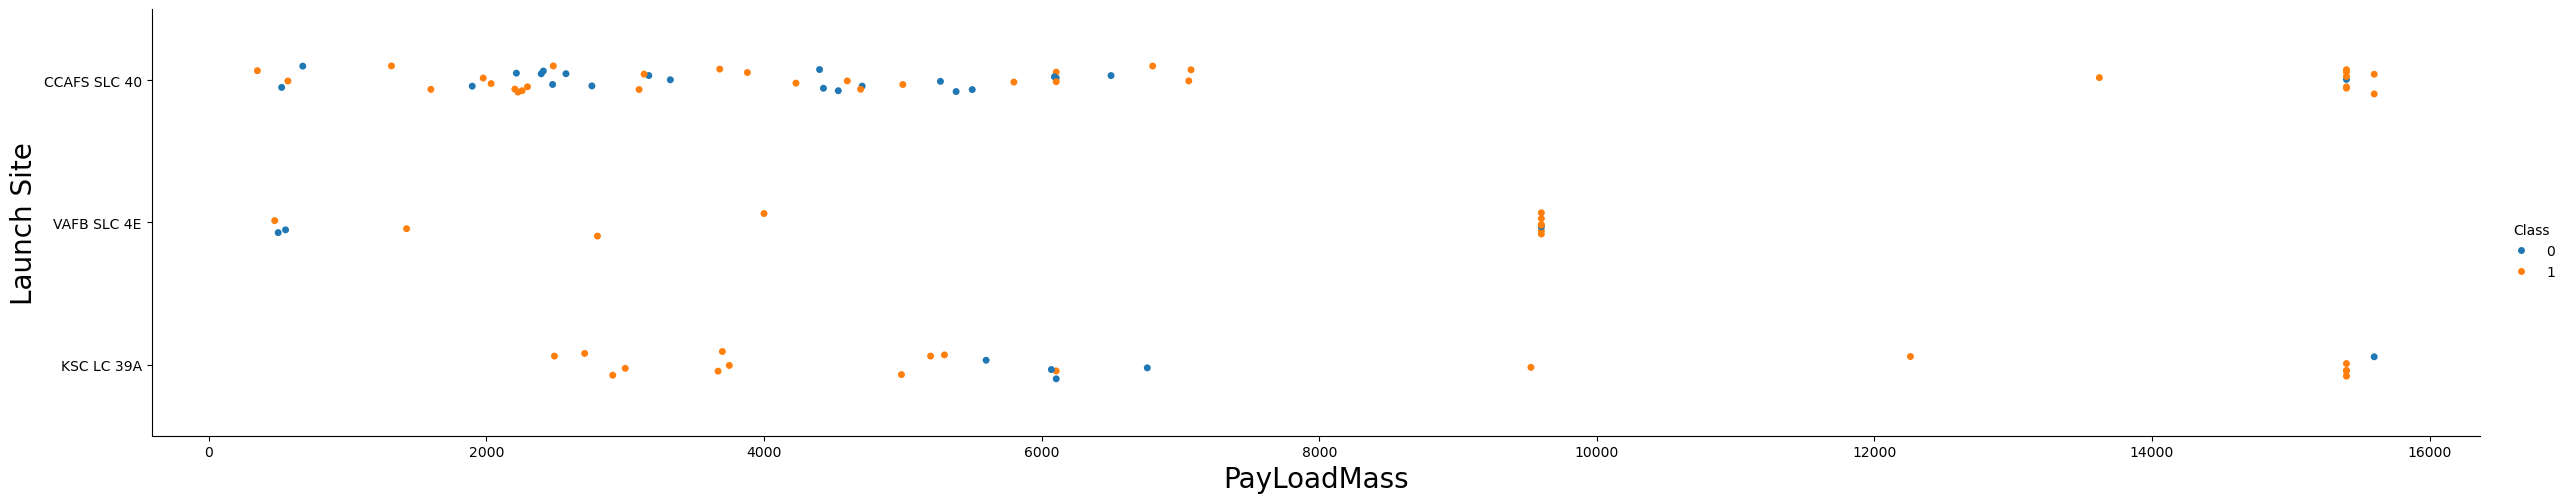

In [114]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=data, aspect =5)
plt.xlabel("PayLoadMass", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

3. Visualize the relationship between success rate of each orbit type

In [119]:
y = data['Orbit']
x= data['Outcome']

data_rank = data.groupby("Orbit").count()

data_rank.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
Orbit,,,,,,,,,,,,,,,,,
ES-L1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
GEO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
GTO,27,27,27,27,27,27,27,27,27,27,15,27,27,27,27,27,27
HEO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ISS,21,21,21,21,21,21,21,21,21,21,16,21,21,21,21,21,21


4. Visualize the relationship between FlightNumber and Orbit type¶

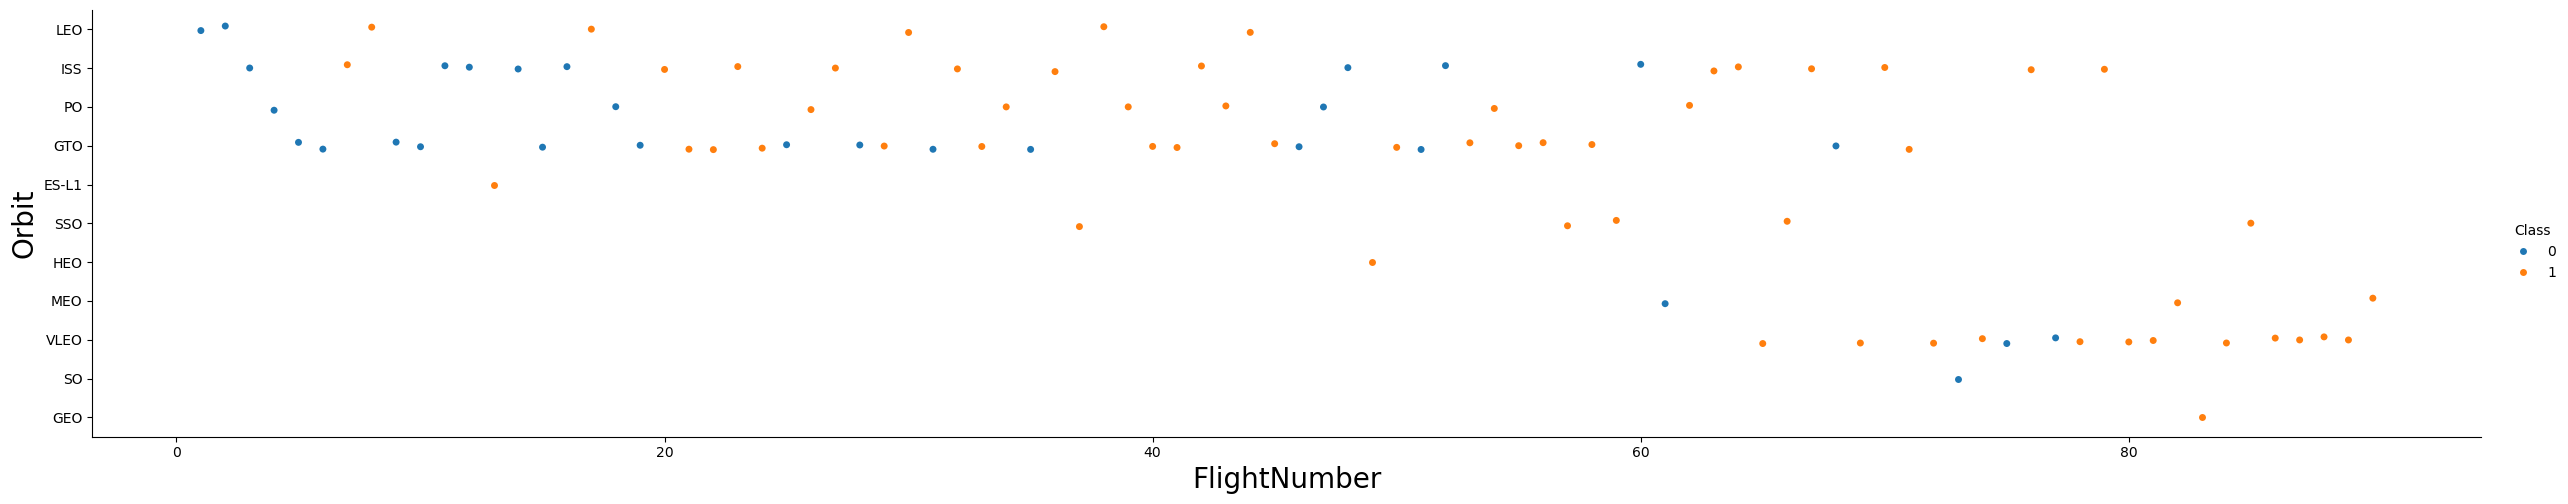

In [122]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=data, aspect = 5)
plt.xlabel("FlightNumber", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

5. Visualize the relationship between Payload Mass and Orbit type

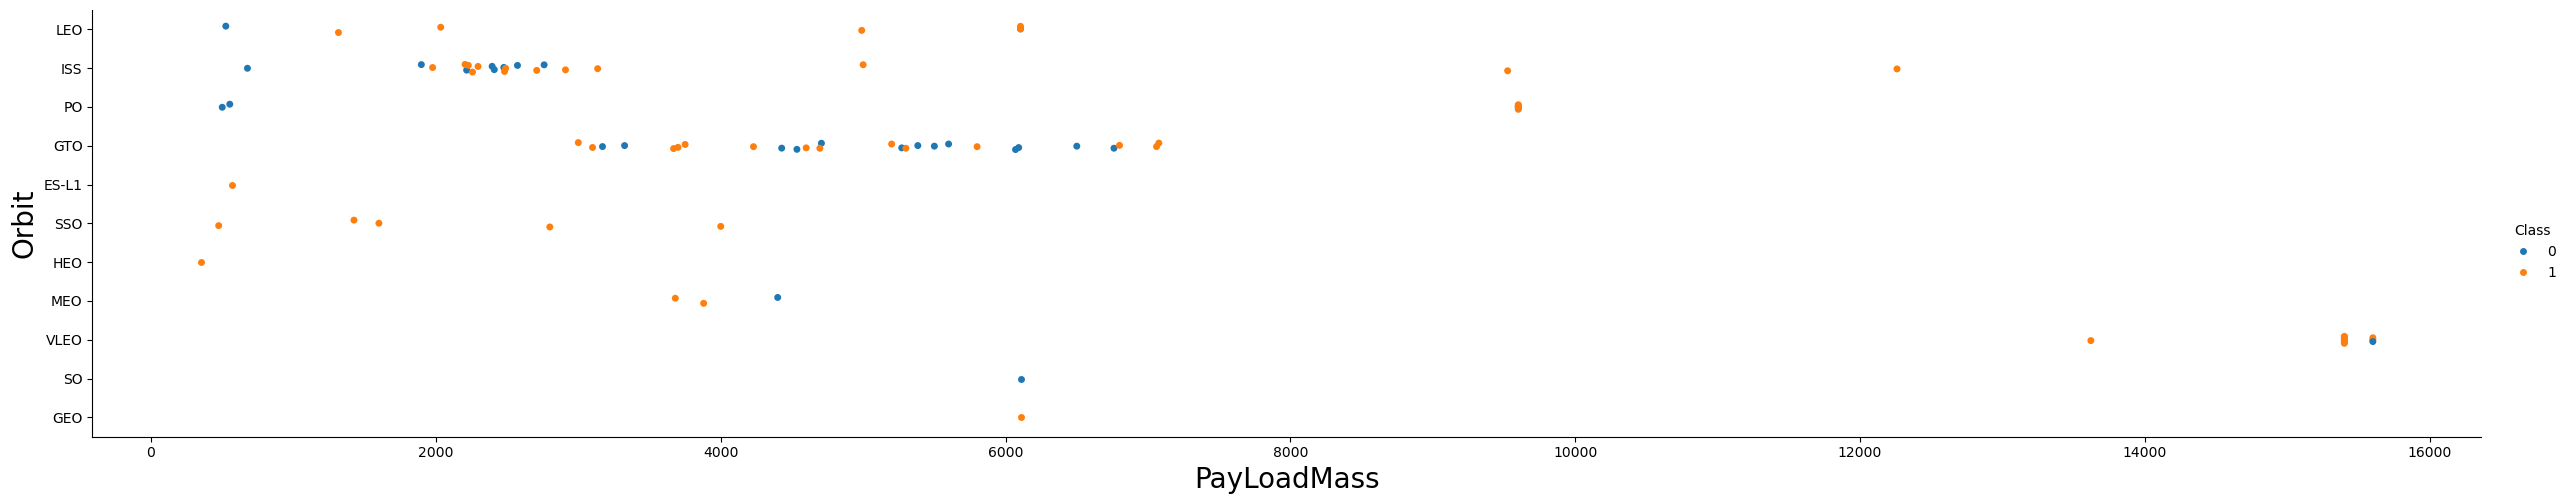

In [125]:
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=data, aspect = 5)
plt.xlabel("PayLoadMass", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

6. Visualize the launch success yearly trend

In [128]:
year=[]
def Extract_year():
    for i in data["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
data['Date'] = year

Text(0, 0.5, 'Outcome')

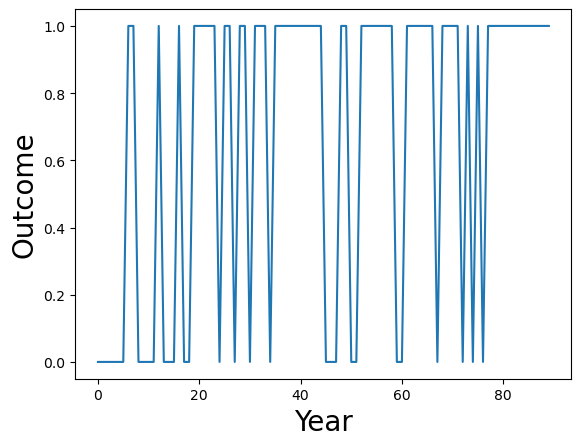

In [130]:
sns.lineplot(x=data.index, y=data["Class"])
plt.xlabel("Year", fontsize=20)
plt.ylabel("Outcome", fontsize=20)

Now, we will move on to Feature Engineering, where we will select the Features that would be most useful in predicting the machine learning model.

In [135]:
features = data[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


7. Create dummy variables to categorical columns with OneHotEncoder

In [139]:
features_one_hot = pd.get_dummies(features)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


8. Cast all numeric columns to float64

In [142]:
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 4. Interactive Visual Analysis

The launch depends on many factors, including location and proximity to a launch site.

We now will find the optimal launchsite using interactive visual analysis using Folium.

In [14]:
import sys
import subprocess

subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'folium'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pandas'])

import folium
import pandas as pd

In [30]:
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

## Task 1: Mark all launch sites on a map

In [18]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
data.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [22]:
va_data = data[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = va_data.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [24]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [32]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [34]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
vafb_coordinates = [34.750144,-120.521294]
ksc_coordinates = [28.573255,-80.646895]
ccafs_coordinates = [28.562302,-80.577356]
ccafs_slc_coordinates = [28.563197,-80.576820]

vafb_circle = folium.Circle(vafb_coordinates, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Vandenberg Space Force Base'))
vafb_marker = folium.map.Marker(vafb_coordinates, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'VAFB SLE 4E'))
site_map.add_child(vafb_circle)
site_map.add_child(vafb_marker)

ksc_circle = folium.Circle(ksc_coordinates, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Kennedy Space Center'))
ksc_marker = folium.map.Marker(ksc_coordinates, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'KSC LC-39A'))
site_map.add_child(ksc_circle)
site_map.add_child(ksc_marker)

ccafs_circle = folium.Circle(ccafs_coordinates, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Cape Canaveral LC'))
ccafs_marker = folium.map.Marker(ccafs_coordinates, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'CCAFS LC-40'))
site_map.add_child(ccafs_circle)
site_map.add_child(ccafs_marker)

ccafs_slc_circle = folium.Circle(ccafs_slc_coordinates, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Cape Canaveral SLC'))
ccafs_slc_marker = folium.map.Marker(ccafs_slc_coordinates, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'CCAFS SLC-40'))
site_map.add_child(ccafs_slc_circle)
site_map.add_child(ccafs_slc_marker)

# Task 2: Mark the successful/failed launches for each site on the map

In [39]:
va_data.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [46]:
# To create Markers of the successful/failed launches of each site
# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red
marker_cluster = MarkerCluster()
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
va_data['marker_color'] = va_data['class'].apply(assign_marker_color)
va_data.tail(10)

/var/folders/s7/mr8qzk2x73gfm8r1k79gkmvw0000gn/T/ipykernel_21039/3396231507.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va_data['marker_color'] = va_data['class'].apply(assign_marker_color)


,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


In [48]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in va_data.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
    marker_cluster.add_child(marker)

site_map

# TASK 3: Calculate the distances between a launch site to its proximities

Next, we need to explore and analyze the proximities of launch sites using MousePosition.

In [52]:
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [54]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [56]:
railway_marker = [28.55752, -80.80155]
launch_coordinate = [28.57337, -80.64669]
distance_railway = calculate_distance(railway_marker[0], railway_marker[1], launch_coordinate[0], launch_coordinate[1])
distance_railway

15.230651245141603

In [58]:
# create and add a folium.Marker on your selected closest raiwaly point on the map
# show the distance to the launch site using the icon property 
marker = folium.map.Marker(
        railway_marker,
        # Create an icon as a text label
        icon=DivIcon(
            icon_size=(400, 400),
            icon_anchor=(0, 0),
            html='<div style="font-size:400; color:#0c10f2;"><b>%s</b></div>' % str(round(distance_railway, 2))+' km',
            )
    )
marker.add_to(site_map)

site_map

In [62]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
folium.PolyLine([railway_marker, launch_coordinate], color='blue').add_to(site_map)
site_map

In [64]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site
city   = [28.61200, -80.80788]
coastline = [28.5858, -80.79952]
highway   = [28.5402, -80.85079]

city_distance = calculate_distance(city[0], city[1], launch_coordinate[0], launch_coordinate[1])
coastline_distance = calculate_distance(coastline[0], coastline[1], launch_coordinate[0], launch_coordinate[1])
highway_distance = calculate_distance(highway[0], highway[1], launch_coordinate[0], launch_coordinate[1])

colors = ['red','orange','green']
html_colors = ['#dc3545','#fd7e14','#198754']

for coordinate ,distance, color, html_color in zip([city, coastline, highway], [city_distance, coastline_distance, highway_distance], colors, html_colors):
    marker = folium.map.Marker(
            coordinate,
            # Create an icon as a text label
            icon=DivIcon(
                icon_size=(20,20),
                icon_anchor=(0,0),
                html='<div style="font-size: 12; color:'+html_color+';"><b>%s</b></div>' % str(round(distance, 2)) + 'km',
                )
            )
    marker.add_to(site_map)
    folium.PolyLine([coordinate, launch_coordinate], color=color).add_to(site_map)
site_map

# 5. Predictive Analysis Model

Now, we can develop a machine learning model to predict whether the first stage of the Falcon 9 will land.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [71]:
# To create a confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [73]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [75]:
X = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Task 1: Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [79]:
Y = data["Class"].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Task 2: Standardize the data in X then reassign it to the variable X using the transform provided below.

In [82]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

Task 3: Use the function train_test_split to split the data X and Y into training and test data.

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


Task 4: Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [88]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [90]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid=parameters,scoring='accuracy', cv=10)
logreg_cv.fit(X_train, Y_train)
logreg_cv.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [92]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Task 5: Calculate the accuracy on the test data using the method score.

In [95]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

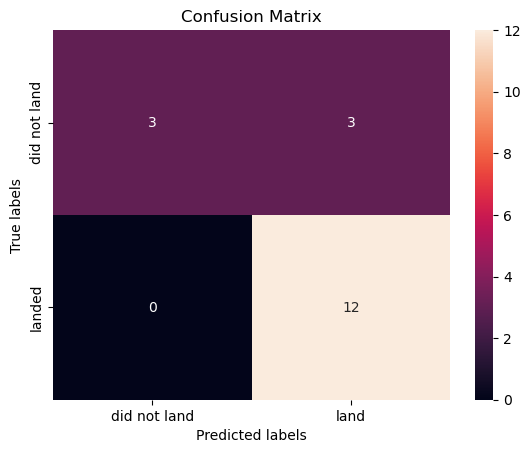

In [97]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Task 6: Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [100]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [102]:
svm_cv = GridSearchCV(svm, param_grid=parameters,scoring='accuracy', cv=10)
svm_cv.fit(X_train, Y_train)
svm_cv.best_params_

{'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}

In [104]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Task 7: Calculate the accuracy on the test data using the method score.

In [107]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

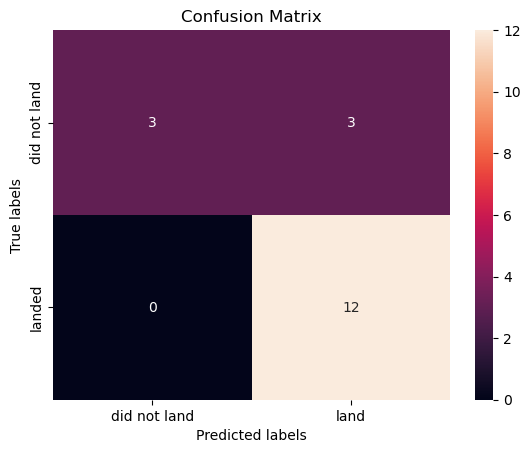

In [109]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Task 8: Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [112]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [114]:
tree_cv = GridSearchCV(tree, param_grid=parameters,scoring='accuracy', cv=10)
tree_cv.fit(X_train, Y_train)
tree_cv.best_params_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/sit

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}

In [116]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8785714285714284


Task 9: Calculate the accuracy of tree_cv on the test data using the method score.

In [119]:
tree_cv.score(X_test, Y_test)

0.7777777777777778

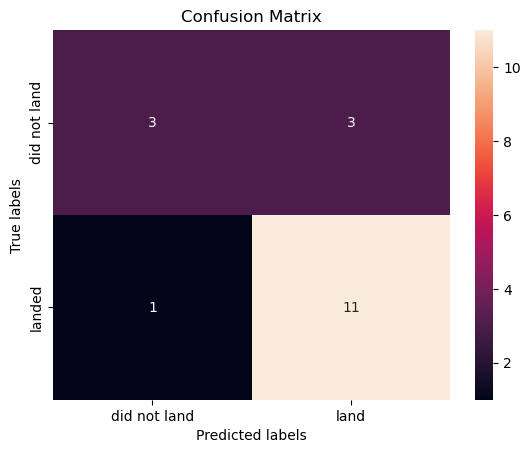

In [121]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Task 10: Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [124]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [126]:
knn_cv = GridSearchCV(KNN, param_grid=parameters,scoring='accuracy', cv=10)
knn_cv.fit(X_train, Y_train)
knn_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}

In [128]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Task 11: Calculate the accuracy of knn_cv on the test data using the method score.

In [131]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

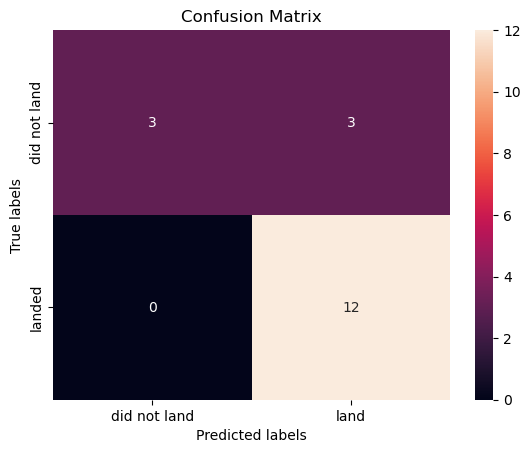

In [133]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

TASK 12: Find the method performs best. 

The decision tree model method works best and is the most accurate.

# Author:
## Akshara Gade